#Instagram Fake and Automated Account Detection

Paper Link: https://arxiv.org/pdf/1910.03090.pdf  
Report Link: [Google document](https://docs.google.com/document/d/16OXp04hV8UNaa5taGuNQ3JnAeD0pbmJS3Yz6mXnVN5s/edit?usp=sharing)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import StandardScaler

##EXPLORATORY DATA ANALYSIS

In [3]:
df_automated_original = pd.read_json('https://raw.githubusercontent.com/fcakyon/instafake-dataset/master/data/automated-v1.0/automatedAccountData.json')
df_nonautomated_original  = pd.read_json('https://raw.githubusercontent.com/fcakyon/instafake-dataset/master/data/automated-v1.0/nonautomatedAccountData.json')
df_fake_original=pd.read_json('https://raw.githubusercontent.com/fcakyon/instafake-dataset/master/data/fake-v1.0/fakeAccountData.json')
df_real_original=pd.read_json('https://raw.githubusercontent.com/fcakyon/instafake-dataset/master/data/fake-v1.0/realAccountData.json')

In [4]:
df_automated=df_automated_original.copy()
df_nonautomated=df_nonautomated_original.copy()
df_real=df_real_original.copy()
df_fake=df_fake_original.copy()

df_automated = df_automated[df_automated.userFollowingCount != 0]
df_nonautomated = df_nonautomated[df_nonautomated.userFollowingCount != 0]
df_automated['FFR'] = df_automated['userFollowerCount']/df_automated['userFollowingCount']
df_nonautomated['FFR'] = df_nonautomated['userFollowerCount']/df_nonautomated['userFollowingCount']
df_automated['mediaPresent'] = np.where(df_automated['userMediaCount'] > 0, 1, 0)
df_nonautomated['mediaPresent'] = np.where(df_nonautomated['userMediaCount'] > 0, 1, 0)

In [5]:
df_mixed1=[df_automated,df_nonautomated]
df_mixed2=[df_real,df_fake]
df = pd.concat(df_mixed1)
df2=df.copy()
df = pd.concat(df_mixed2)
df1=df.copy()
df2['LCR']=df2['mediaCommentNumbers'].apply(sum)
df2 = df2[df2.LCR != 0]

df2['LCR'] = df2['mediaLikeNumbers'].apply(sum)/df2['mediaCommentNumbers'].apply(sum)
df2

,userMediaCount,mediaLikeNumbers,mediaCommentNumbers,mediaCommentsAreDisabled,mediaHashtagNumbers,mediaUploadTimes,mediaHasLocationInfo,userFollowerCount,userFollowingCount,userHasHighlighReels,userHasExternalUrl,userTagsCount,userBiographyLength,usernameLength,usernameDigitCount,automatedBehaviour,FFR,mediaPresent,LCR
0,97,"[100, 78, 112, 78, 77, 111, 97, 95, 63, 83, 42...","[5, 2, 10, 0, 3, 2, 2, 2, 4, 0, 0, 6, 6, 0, 2,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[10, 10, 12, 10, 13, 13, 10, 12, 10, 11, 11, 1...","[1540847457, 1540744841, 1538410400, 153729214...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1612,7108,0,1,36,133,12,0,1,0.226787,1,22.432773
1,863,"[229, 331, 180, 326, 313, 157, 245, 161, 182, ...","[3, 2, 3, 4, 7, 2, 0, 6, 2, 2, 1, 9, 2, 0, 2, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[8, 11, 14, 17, 12, 10, 13, 14, 14, 11, 10, 11...","[1542664246, 1542569444, 1542564418, 154211928...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",3028,912,1,0,77,99,11,0,1,3.320175,1,35.985014
2,149,"[237, 254, 350, 257, 180, 172, 141, 84, 218, 8...","[12, 16, 37, 11, 3, 4, 2, 4, 5, 1, 1, 2, 3, 3,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[25, 25, 25, 25, 15, 15, 15, 5, 15, 10, 10, 10...","[1543220394, 1542972220, 1542868998, 154278889...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, ...",5213,1157,1,1,56,120,18,0,1,4.505618,1,35.000000
3,33,"[163, 30, 92, 111, 145, 110, 81, 81, 61, 60, 6...","[2, 2, 7, 14, 17, 3, 2, 5, 2, 1, 5, 5, 8, 1, 4...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 14, 14, 0, 0...","[1543886933, 1543793413, 1543704343, 154344770...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",12423,1763,0,0,2,55,13,0,1,7.046512,1,13.613924
4,1000,"[61, 222, 437, 829, 681, 440, 920, 256, 1017, ...","[4, 0, 13, 9, 9, 6, 16, 4, 25, 6, 3, 4, 16, 10...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[4, 1, 2, 3, 3, 0, 0, 1, 0, 2, 1, 2, 3, 1, 1, ...","[1543939920, 1543699089, 1543187756, 154264414...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",9496,2412,1,0,91,33,8,0,1,3.936982,1,44.704881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,59,"[112, 131, 131, 111, 109, 114, 123, 149, 117, ...","[6, 2, 4, 2, 0, 2, 0, 2, 0, 5, 2, 8, 7, 0, 4, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1520524927, 1519578397, 1519490820, 151776533...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, ...",256,277,0,0,24,0,9,0,0,0.924188,1,39.330709
695,26,"[117, 82, 70, 50, 94, 45, 40, 47, 44, 43, 45, ...","[0, 1, 0, 0, 4, 0, 0, 2, 1, 0, 5, 6, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 1, 0, 2, 1, 0, 1, 1, 0, 0, 1, 0, 2, ...","[1533665377, 1529705967, 1525534881, 145340569...","[1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, ...",303,335,0,0,23,22,12,0,0,0.904478,1,35.275862
696,12,"[86, 87, 75, 24, 30, 29, 22, 33, 34, 29, 17, 13]","[4, 5, 10, 0, 0, 1, 1, 2, 0, 0, 3, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]","[1541858886, 1539619797, 1537199999, 146400347...","[1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0]",270,318,0,0,10,23,11,0,0,0.849057,1,18.423077
697,11,"[28, 18, 20, 15, 8, 13, 17, 15, 10, 4, 11]","[0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[2, 10, 6, 0, 3, 2, 6, 4, 0, 2, 0]","[1417601401, 1416411495, 1412454197, 140580953...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",175,179,0,0,4,6,5,0,0,0.977654,1,39.750000


In [6]:
df1.head()

,userFollowerCount,userFollowingCount,userBiographyLength,userMediaCount,userHasProfilPic,userIsPrivate,usernameDigitCount,usernameLength,isFake
0,258,238,0,0,1,0,0,10,0
1,263,482,30,29,1,1,0,8,0
2,51,78,9,0,1,1,0,10,0
3,297,480,22,25,1,1,2,9,0
4,113,242,0,95,1,1,0,10,0


In [7]:
df2.head()

,userMediaCount,mediaLikeNumbers,mediaCommentNumbers,mediaCommentsAreDisabled,mediaHashtagNumbers,mediaUploadTimes,mediaHasLocationInfo,userFollowerCount,userFollowingCount,userHasHighlighReels,userHasExternalUrl,userTagsCount,userBiographyLength,usernameLength,usernameDigitCount,automatedBehaviour,FFR,mediaPresent,LCR
0,97,"[100, 78, 112, 78, 77, 111, 97, 95, 63, 83, 42...","[5, 2, 10, 0, 3, 2, 2, 2, 4, 0, 0, 6, 6, 0, 2,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[10, 10, 12, 10, 13, 13, 10, 12, 10, 11, 11, 1...","[1540847457, 1540744841, 1538410400, 153729214...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1612,7108,0,1,36,133,12,0,1,0.226787,1,22.432773
1,863,"[229, 331, 180, 326, 313, 157, 245, 161, 182, ...","[3, 2, 3, 4, 7, 2, 0, 6, 2, 2, 1, 9, 2, 0, 2, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[8, 11, 14, 17, 12, 10, 13, 14, 14, 11, 10, 11...","[1542664246, 1542569444, 1542564418, 154211928...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",3028,912,1,0,77,99,11,0,1,3.320175,1,35.985014
2,149,"[237, 254, 350, 257, 180, 172, 141, 84, 218, 8...","[12, 16, 37, 11, 3, 4, 2, 4, 5, 1, 1, 2, 3, 3,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[25, 25, 25, 25, 15, 15, 15, 5, 15, 10, 10, 10...","[1543220394, 1542972220, 1542868998, 154278889...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, ...",5213,1157,1,1,56,120,18,0,1,4.505618,1,35.000000
3,33,"[163, 30, 92, 111, 145, 110, 81, 81, 61, 60, 6...","[2, 2, 7, 14, 17, 3, 2, 5, 2, 1, 5, 5, 8, 1, 4...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 14, 14, 0, 0...","[1543886933, 1543793413, 1543704343, 154344770...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",12423,1763,0,0,2,55,13,0,1,7.046512,1,13.613924
4,1000,"[61, 222, 437, 829, 681, 440, 920, 256, 1017, ...","[4, 0, 13, 9, 9, 6, 16, 4, 25, 6, 3, 4, 16, 10...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[4, 1, 2, 3, 3, 0, 0, 1, 0, 2, 1, 2, 3, 1, 1, ...","[1543939920, 1543699089, 1543187756, 154264414...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",9496,2412,1,0,91,33,8,0,1,3.936982,1,44.704881


In [8]:
df1.describe()

,userFollowerCount,userFollowingCount,userBiographyLength,userMediaCount,userHasProfilPic,userIsPrivate,usernameDigitCount,usernameLength,isFake
count,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000
mean,369.095477,744.261307,22.847571,57.596315,0.922948,0.657454,0.495812,11.123953,0.167504
std,372.775741,1032.526420,33.492868,107.402157,0.266786,0.474760,1.212010,2.998135,0.373582
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
25%,152.000000,267.000000,0.000000,3.000000,1.000000,0.000000,0.000000,9.000000,0.000000
50%,304.000000,449.000000,7.000000,20.000000,1.000000,1.000000,0.000000,11.000000,0.000000
75%,481.000000,711.000000,33.000000,67.000000,1.000000,1.000000,0.000000,13.000000,0.000000
max,4492.000000,7497.000000,150.000000,1058.000000,1.000000,1.000000,10.000000,30.000000,1.000000


In [9]:
df2.describe()

,userMediaCount,userFollowerCount,userFollowingCount,userHasHighlighReels,userHasExternalUrl,userTagsCount,userBiographyLength,usernameLength,usernameDigitCount,automatedBehaviour,FFR,mediaPresent,LCR
count,1318.000000,1.318000e+03,1318.000000,1318.00000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.0,1318.000000
mean,183.420334,9.005120e+03,1585.890744,0.50000,0.321700,589.220030,61.386950,11.973445,0.250379,0.516692,26.453634,1.0,59.264843
std,255.273256,1.725902e+05,1828.931530,0.50019,0.467306,18325.288851,53.953147,3.816409,0.779081,0.499911,616.978707,0.0,96.580817
min,1.000000,2.400000e+01,1.000000,0.00000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.068782,1.0,1.110702
25%,26.000000,3.552500e+02,398.000000,0.00000,0.000000,5.000000,8.000000,9.000000,0.000000,0.000000,0.786961,1.0,24.500000
50%,73.000000,7.505000e+02,718.000000,0.50000,0.000000,22.000000,48.000000,11.000000,0.000000,1.000000,1.015280,1.0,37.939128
75%,215.750000,3.769000e+03,2050.500000,1.00000,1.000000,60.000000,115.750000,14.000000,0.000000,1.000000,1.941952,1.0,58.908600
max,1000.000000,6.255036e+06,7502.000000,1.00000,1.000000,665233.000000,150.000000,30.000000,6.000000,1.000000,20244.000000,1.0,1588.000000


###DATA VISUALIZATION

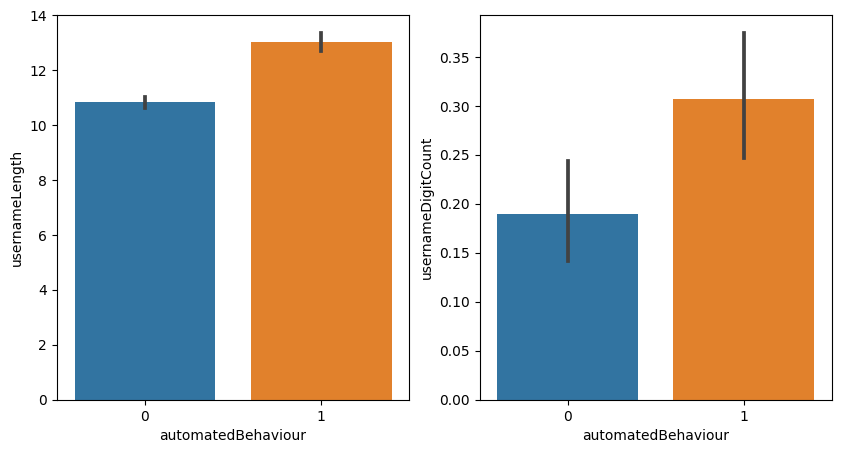

In [40]:
fig, ax =plt.subplots(1,2, figsize=(10, 5))
sns.barplot(x ='automatedBehaviour', y ='usernameLength', data = df2,  palette ='tab10', ax=ax[0])
sns.barplot(x ='automatedBehaviour', y ='usernameDigitCount', data = df2,  palette ='tab10', ax=ax[1])
fig.show()

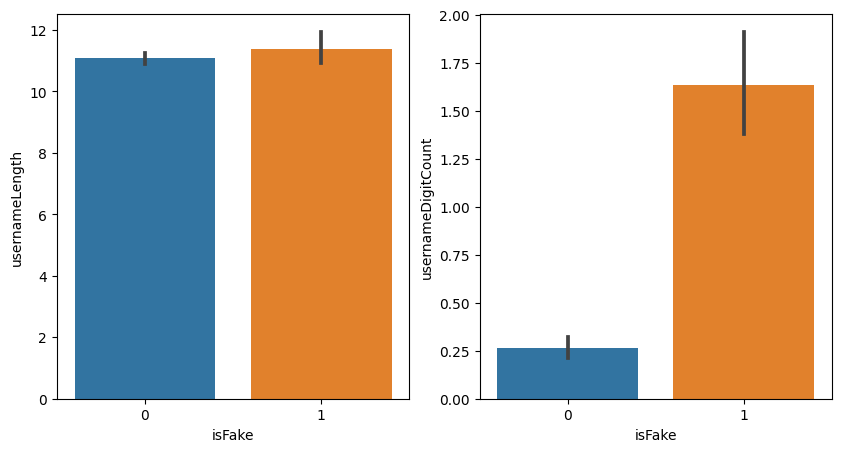

In [43]:
fig, ax =plt.subplots(1,2, figsize=(10, 5))
sns.barplot(x ='isFake', y ='usernameLength', data = df1,  palette ='tab10', ax=ax[0])
sns.barplot(x ='isFake', y ='usernameDigitCount', data = df1,  palette ='tab10', ax=ax[1])
fig.show()

<ipython-input-42-184240cb8ae6>:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='automatedBehaviour',y='userFollowingCount',data=df2, jitter=True,dodge=True, ax=ax[0],palette ='crest')
<ipython-input-42-184240cb8ae6>:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='automatedBehaviour',y='userFollowerCount',data=df2, jitter=True,dodge=True, ax=ax[1], palette ='rocket')


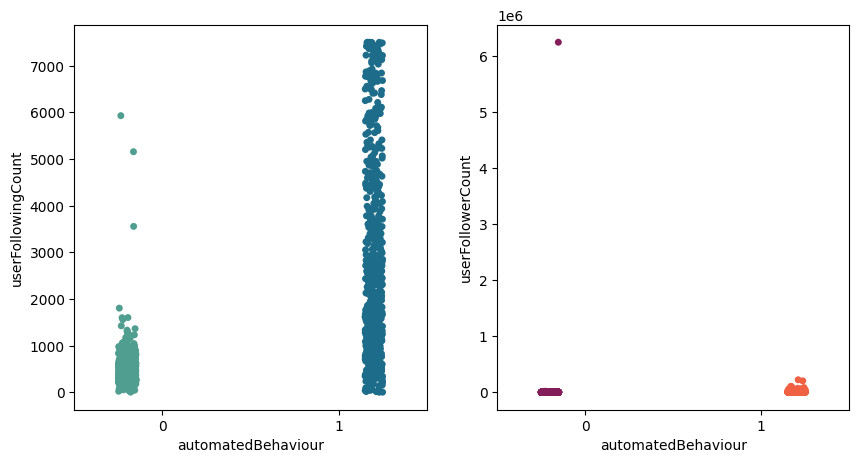

In [42]:
fig, ax =plt.subplots(1,2, figsize=(10, 5))
sns.stripplot(x='automatedBehaviour',y='userFollowingCount',data=df2, jitter=True,dodge=True, ax=ax[0],palette ='crest')
sns.stripplot(x='automatedBehaviour',y='userFollowerCount',data=df2, jitter=True,dodge=True, ax=ax[1], palette ='rocket')
fig.show()

<ipython-input-25-54cd09b118c7>:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='isFake',y='userFollowingCount',data=df1, jitter=True,dodge=True, ax=ax[0],palette ='crest')
<ipython-input-25-54cd09b118c7>:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='isFake',y='userFollowerCount',data=df1, jitter=True,dodge=True, ax=ax[1],palette ='rocket')


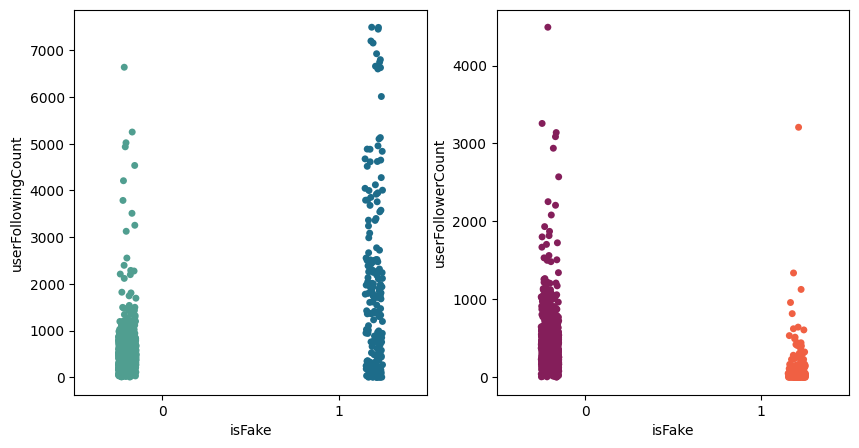

In [25]:
fig, ax =plt.subplots(1,2, figsize=(10, 5))
sns.stripplot(x='isFake',y='userFollowingCount',data=df1, jitter=True,dodge=True, ax=ax[0],palette ='crest')
sns.stripplot(x='isFake',y='userFollowerCount',data=df1, jitter=True,dodge=True, ax=ax[1],palette ='rocket')
fig.show()

<ipython-input-32-bd186e249f58>:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='automatedBehaviour',y='userMediaCount', jitter=True,dodge=True,data=df2, ax=ax[0],palette ='crest')
<ipython-input-32-bd186e249f58>:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='isFake',y='userMediaCount', jitter=True,dodge=True,data=df1, ax=ax[1],palette ='rocket')


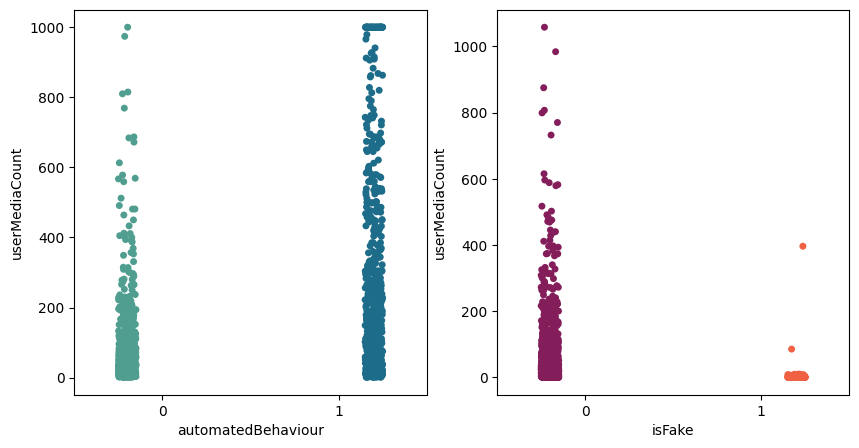

In [32]:
fig, ax =plt.subplots(1,2, figsize=(10, 5))
sns.stripplot(x='automatedBehaviour',y='userMediaCount', jitter=True,dodge=True,data=df2, ax=ax[0],palette ='crest')
sns.stripplot(x='isFake',y='userMediaCount', jitter=True,dodge=True,data=df1, ax=ax[1],palette ='rocket')
fig.show()


/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


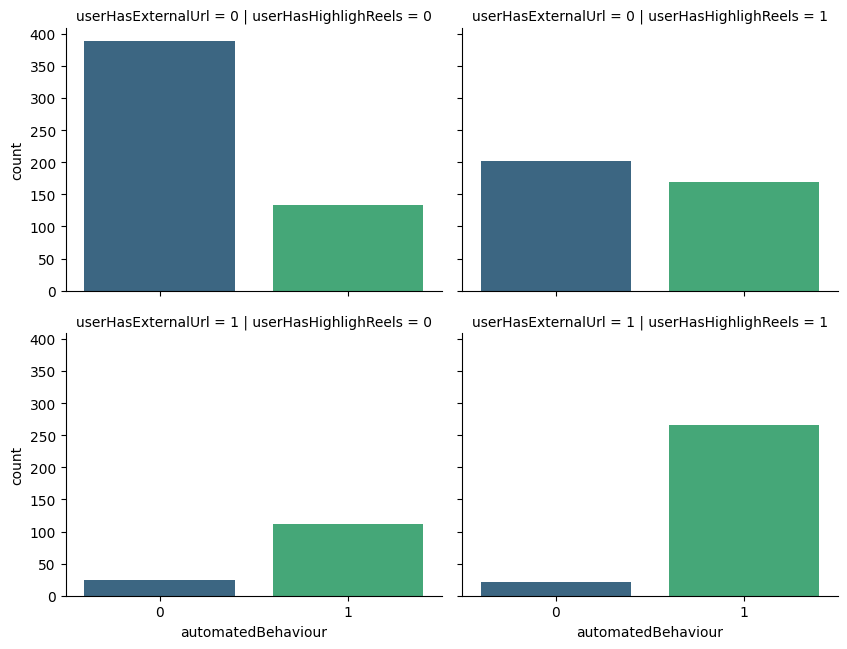

In [26]:
df2_fg = sns.FacetGrid(df2,col='userHasHighlighReels',row='userHasExternalUrl',height=3.3, aspect=1.3)
df2_fg.map(sns.countplot,'automatedBehaviour',palette ='viridis')

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


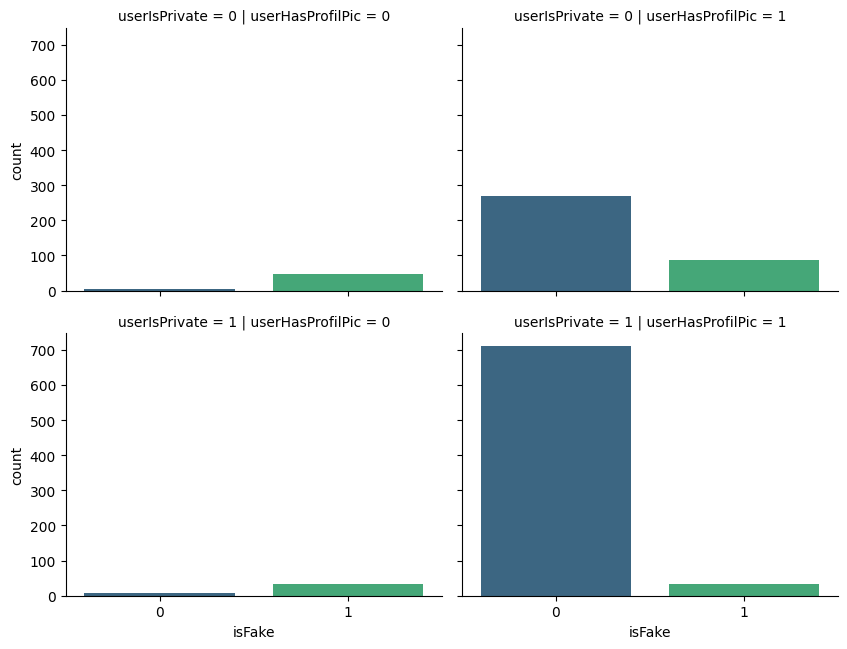

In [30]:
df2_fg = sns.FacetGrid(df1,col='userHasProfilPic',row='userIsPrivate',height=3.3, aspect=1.3)
df2_fg.map(sns.countplot,'isFake',palette ='viridis')

##MODEL BUILDING AND CLASSIFICATION

In [ ]:
col_list=['mediaLikeNumbers','mediaCommentNumbers','mediaHashtagNumbers','mediaCommentsAreDisabled','mediaUploadTimes','mediaHasLocationInfo','usernameDigitCount', 'usernameLength','userBiographyLength']
df2=df2.drop(col_list,axis=1)
df2.head()

,userMediaCount,userFollowerCount,userFollowingCount,userHasHighlighReels,userHasExternalUrl,userTagsCount,automatedBehaviour,FFR,mediaPresent,LCR
0,97,1612,7108,0,1,36,1,0.226787,1,22.432773
1,863,3028,912,1,0,77,1,3.320175,1,35.985014
2,149,5213,1157,1,1,56,1,4.505618,1,35.000000
3,33,12423,1763,0,0,2,1,7.046512,1,13.613924
4,1000,9496,2412,1,0,91,1,3.936982,1,44.704881


In [ ]:
X = df2.copy()
X.drop('automatedBehaviour',axis=1,inplace=True)
Y=df2['automatedBehaviour'] 

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state = 30)

In [ ]:
scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

In [ ]:
results=[]

In [ ]:
clf = svm.SVC(kernel='linear') 
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
print(classification_report(Y_test,y_pred))
print("Confusion Matrix")
print(confusion_matrix(Y_test,y_pred))
print("\n Accuracy")
print(accuracy_score(Y_test,y_pred))
results.append(["Support Vector Machine", accuracy_score(Y_test, y_pred)])

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       207
           1       0.89      0.81      0.85       189

    accuracy                           0.86       396
   macro avg       0.86      0.86      0.86       396
weighted avg       0.86      0.86      0.86       396

Confusion Matrix
[[188  19]
 [ 36 153]]

 Accuracy
0.8611111111111112


In [ ]:
gnb=GaussianNB()
y_pred=gnb.fit(X_train,Y_train).predict(X_test)
print(classification_report(Y_test,y_pred))
print("Confusion Matrix")
print(confusion_matrix(Y_test,y_pred))
print("\n Accuracy")
print(accuracy_score(Y_test,y_pred))
results.append(["Naive Bayes (Gaussian Dist.)", accuracy_score(Y_test, y_pred)])

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       207
           1       0.47      0.98      0.64       189

    accuracy                           0.47       396
   macro avg       0.24      0.49      0.32       396
weighted avg       0.23      0.47      0.31       396

Confusion Matrix
[[  0 207]
 [  3 186]]

 Accuracy
0.4696969696969697


In [ ]:
bnb=BernoulliNB()
y_pred=bnb.fit(X_train,Y_train).predict(X_test)
print(classification_report(Y_test,y_pred))
print("Confusion Matrix")
print(confusion_matrix(Y_test,y_pred))
print("\n Accuracy")
print(accuracy_score(Y_test,y_pred))
results.append(["Naive Bayes (Bernoulli Dist.) ", accuracy_score(Y_test, y_pred)])


              precision    recall  f1-score   support

           0       0.81      0.86      0.84       207
           1       0.84      0.78      0.81       189

    accuracy                           0.82       396
   macro avg       0.82      0.82      0.82       396
weighted avg       0.82      0.82      0.82       396

Confusion Matrix
[[178  29]
 [ 41 148]]

 Accuracy
0.8232323232323232


In [ ]:
##preprocess for nn
Y_train_nn = tf.keras.utils.to_categorical(Y_train, num_classes = 2)
Y_test_nn = tf.keras.utils.to_categorical(Y_test, num_classes = 2)

In [ ]:
model = tf.keras.Sequential()
model.add(keras.layers.Dense(50, input_dim = 9, activation = 'relu'))
model.add(keras.layers.Dense(150, activation = 'relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(25, activation = 'relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(2, activation = 'softmax'))
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 50)                500       
                                                                 
 dense_61 (Dense)            (None, 150)               7650      
                                                                 
 dropout_30 (Dropout)        (None, 150)               0         
                                                                 
 dense_62 (Dense)            (None, 25)                3775      
                                                                 
 dropout_31 (Dropout)        (None, 25)                0         
                                                                 
 dense_63 (Dense)            (None, 2)                 52        
                                                                 
Total params: 11,977
Trainable params: 11,977
Non-tra

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
epochs_hist = model.fit(X_train, Y_train_nn, epochs = 30)
model.evaluate(X_test,Y_test_nn)
results.append(["Neural Network", model.evaluate(X_test,Y_test_nn)[1]])



Epoch 1/30
29/29 [==============================] - 2s 4ms/step - loss: 0.5051 - accuracy: 0.7972
Epoch 2/30
29/29 [==============================] - 0s 4ms/step - loss: 0.3803 - accuracy: 0.8438
Epoch 3/30
29/29 [==============================] - 0s 4ms/step - loss: 0.3403 - accuracy: 0.8720
Epoch 4/30
29/29 [==============================] - 0s 4ms/step - loss: 0.3233 - accuracy: 0.8764
Epoch 5/30
29/29 [==============================] - 0s 4ms/step - loss: 0.3211 - accuracy: 0.8731
Epoch 6/30
29/29 [==============================] - 0s 4ms/step - loss: 0.3062 - accuracy: 0.8829
Epoch 7/30
29/29 [==============================] - 0s 4ms/step - loss: 0.2956 - accuracy: 0.8905
Epoch 8/30
29/29 [==============================] - 0s 4ms/step - loss: 0.3066 - accuracy: 0.8915
Epoch 9/30
29/29 [==============================] - 0s 4ms/step - loss: 0.2943 - accuracy: 0.8839
Epoch 10/30
29/29 [==============================] - 0s 4ms/step - loss: 0.3068 - accuracy: 0.8883
Epoch 11/30
29/29 [

##Cost Sensitive Feature Selection


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from sklearn.metrics import precision_recall_fscore_support
from sklearn.neural_network import MLPClassifier


feature_vector = np.random.randint(low=0, high=2, size=10)

# Define feature costs as a dictionary
feature_costs = {
    'userMediaCount': 2,
    'userFollowerCount': 4,
    'userHasHighlighReels': 2,
    'userFollowingCount': 4,
    'userHasExternalUrl': 2,
    'FFR': 4,
    'userTagsCount':3,
    'mediaPresent': 1,
    'LCR':2
    # add more features and their costs here
}

fitness_score=[]

def fitness(X, y, feature_vector):
    total_cost = sum([feature_costs[list(X.columns)[i]] * feature_vector[i] for i in range(len(feature_vector))])
    selected_features = X.columns[np.nonzero(feature_vector)[0]]
    X_selected = X[selected_features]
    clf = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='adam')
    clf.fit(X_selected, y)
    y_pred = clf.predict(X_selected)
    precision, recall, _, _ = precision_recall_fscore_support(y, y_pred, average='binary')
    f2_score = (5 * precision * recall) / ((4* precision) + recall)
    fitness = f2_score*100 - 2*total_cost
    return fitness

def genetic_algorithm(X, y, population_size, num_generations, mutation_rate):
    population = np.random.randint(2, size=(population_size, X.shape[1]))
    best_fitness = -np.inf
    best_individual = None
    for i in range(num_generations):
        fitness_values = [fitness(X, y, population[j]) for j in range(population.shape[0])]
        best_index = np.argmax(fitness_values)
        if fitness_values[best_index] > best_fitness:
            best_fitness = fitness_values[best_index]
            best_individual = population[best_index]

        fitness_score.append(best_fitness)
        
        random_index = np.random.randint(population_size)
        
        tournament_size = 4
        tournament_indices = np.random.choice(population_size, tournament_size, replace=False)
        tournament_fitness = [fitness_values[j] for j in tournament_indices]
        parent1 = population[tournament_indices[np.argmax(tournament_fitness)]]
        tournament_indices = np.random.choice(population_size, tournament_size, replace=False)
        tournament_fitness = [fitness_values[j] for j in tournament_indices]
        parent2 = population[tournament_indices[np.argmax(tournament_fitness)]]
        
        crossover_point = np.random.randint(X.shape[1])
        child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
        child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
        
        mutation_index = np.random.randint(population_size)
        mutation_mask = np.random.binomial(1, mutation_rate, size=X.shape[1])
        population[mutation_index] = np.logical_xor(population[mutation_index], mutation_mask)
        
        population=np.vstack([population, best_individual])
        population=np.vstack([population, child1])
        population=np.vstack([population, child2])
    selected_features = X.columns[np.nonzero(best_individual)[0]]
    print(selected_features)

In [ ]:
fitness_score=[]
genetic_algorithm(X, Y,4,3,1 )
print(fitness_score)

##Fake/Real Dataset

In [ ]:
df1.head()
results2=[]
X = df1.copy()
X.drop('isFake',axis=1,inplace=True)
Y=df1['isFake'] 


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state = 30)

In [ ]:
scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

In [ ]:
clf = svm.SVC(kernel='linear') 
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
print(classification_report(Y_test,y_pred))
print("Confusion Matrix")
print(confusion_matrix(Y_test,y_pred))
print("\n Accuracy")
print(accuracy_score(Y_test,y_pred))
results2.append(["Support Vector Machine", accuracy_score(Y_test, y_pred)])

In [ ]:
gnb=GaussianNB()
y_pred=gnb.fit(X_train,Y_train).predict(X_test)
print(classification_report(Y_test,y_pred))
print("Confusion Matrix")
print(confusion_matrix(Y_test,y_pred))
print("\n Accuracy")
print(accuracy_score(Y_test,y_pred))
results2.append(["Naive Bayes (Gaussian Dist.) ", accuracy_score(Y_test, y_pred)])

In [ ]:
bnb=BernoulliNB()
y_pred=bnb.fit(X_train,Y_train).predict(X_test)
print(classification_report(Y_test,y_pred))
print("Confusion Matrix")
print(confusion_matrix(Y_test,y_pred))
print("\n Accuracy")
print(accuracy_score(Y_test,y_pred))
results2.append(["Naive Bayes (Bernoulli Dist.)", accuracy_score(Y_test, y_pred)])


In [ ]:
##preprocess for nn
Y_train_nn = tf.keras.utils.to_categorical(Y_train, num_classes = 2)
Y_test_nn = tf.keras.utils.to_categorical(Y_test, num_classes = 2)

In [ ]:
model = tf.keras.Sequential()
model.add(keras.layers.Dense(50, input_dim = 8, activation = 'relu'))
model.add(keras.layers.Dense(150, activation = 'relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(25, activation = 'relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(2, activation = 'softmax'))
model.summary()

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
epochs_hist = model.fit(X_train, Y_train_nn, epochs = 30)
model.evaluate(X_test,Y_test_nn)
results2.append(["Neural Network", model.evaluate(X_test,Y_test_nn)[1]])


##CONCLUSION

##On Automated and Non-Automated Account Dataset

In [ ]:
df_results = pd.DataFrame(results, columns=['Model Name', 'Accuracy'])
df_results

##On Fake and Real Account Dataset

In [ ]:
df_results = pd.DataFrame(results2, columns=['Model Name', 'Accuracy'])
df_results